In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

pd.options.display.max_rows = 100

In [10]:
def load_original_data():
    file=pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv', index_col=0)
    return file

In [11]:
ica_df=load_original_data()

In [12]:
ica_df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,26794,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,64811,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [13]:
## Selecting the numerical variables
numericals= ica_df._get_numeric_data()
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [14]:
## xy split
x=numericals.drop('total_claim_amount', axis=1)
y=numericals.total_claim_amount

In [15]:
x

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809,48029,61,7,52,0,9
1,2228,26794,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,15,31,1,7
...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7
10685,5259,61146,65,7,68,0,6
10686,23893,39837,201,11,63,0,2
10687,11971,64195,158,0,27,4,6


In [16]:
y

0         292
1         744
2         480
3         484
4         707
         ... 
10684    1214
10685     273
10686     381
10687     618
10688    1021
Name: total_claim_amount, Length: 10689, dtype: int64

In [17]:
Q1 = numericals.quantile(0.25)
Q3 = numericals.quantile(0.75)
IQR = Q3 - Q1
numericals = numericals[((numericals > (Q1 - 1.5 * IQR)) |(numericals < (Q3 + 1.5 * IQR))).any(axis=1)]
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [18]:
## seperating the data into train and test for both a and y variables
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.30, random_state=100)

In [19]:
x_test

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
9700,2690,60060,67,24,12,0,1
4662,10628,90874,137,18,28,4,3
1401,9259,77409,127,11,86,0,3
6313,9388,33599,80,23,31,0,2
8906,10056,16097,139,7,6,0,7
...,...,...,...,...,...,...,...
2913,2121,90384,62,11,45,0,1
8340,29194,35296,126,19,11,0,2
5910,13736,16181,181,22,79,0,8
3016,4984,86305,62,1,99,0,5


In [20]:
##. finding the parameters ( mean, variance from the training set )
std_scaler=StandardScaler().fit(x_train)

x_train_scaled=std_scaler.transform(x_train)

In [21]:
## checking shape of training sample
x_train.shape

(7482, 7)

In [22]:
x_test_scaled=std_scaler.transform(x_test)

In [23]:
print(x_train_scaled)
print("--------")
print(x_test_scaled)

[[-0.30279362  1.38420579 -0.55997483 ... -0.55202731 -0.42458938
   0.00755297]
 [-0.8099625  -1.18180159 -0.82461546 ...  1.60171543 -0.42458938
  -0.82349639]
 [-0.39119788  1.92167435 -0.58937935 ... -0.15717448 -0.42458938
   0.00755297]
 ...
 [-0.15299751 -1.43974961 -0.94223352 ... -1.23404584 -0.42458938
  -0.40797171]
 [ 0.10311483  1.49724099  0.52799221 ...  0.0581998  -0.42458938
   0.00755297]
 [-0.55009442  0.16154903 -0.85401998 ...  0.9555926   0.66000527
   1.66965171]]
--------
[[-0.76763824  0.33296637 -0.76580643 ... -1.30583727 -0.42458938
  -0.82349639]
 [ 0.37901701  1.56853457  1.2925096  ... -0.73150587  3.91378922
   0.00755297]
 [ 0.18126304  1.02862006  0.99846445 ...  1.35044544 -0.42458938
   0.00755297]
 ...
 [ 0.82797197 -1.42647729  2.58630824 ...  1.09917545 -0.42458938
   2.0851764 ]
 [-0.43626672  1.38532852 -0.91282901 ...  1.8170897  -0.42458938
   0.83860234]
 [-0.18665469 -0.2752745  -0.2953342  ...  0.9555926  -0.42458938
   1.25412703]]


In [24]:
## Applying Linear regression
x.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies'],
      dtype='object')

In [25]:
x_train_const_scaled = sm.add_constant(x_train_scaled) # adding a constant

model = sm.OLS(y_train, x_train_const_scaled).fit()
predictions_train = model.predict(x_train_const_scaled) 

x_test_const_scaled = sm.add_constant(x_test_scaled) # adding a constant
predictions_test = model.predict(x_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     740.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:11:56   Log-Likelihood:                -51122.
No. Observations:                7482   AIC:                         1.023e+05
Df Residuals:                    7474   BIC:                         1.023e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        434.8696      2.596    167.491      0.0

In [26]:
predictions_test

array([287.17794698, 613.93161079, 584.07174495, ..., 965.07576417,
       221.473416  , 393.55449724])

In [27]:
#display adjusted R-squared
print(model.rsquared_adj)

0.409082150689581


In [28]:
model=LinearRegression()    # model
model.fit(x_train_scaled, y_train)   # model train

LinearRegression()

In [29]:
model.coef_

array([ -6.08905566, -33.06917246, 185.95930252,   1.25397835,
        -1.32231182,  -2.16230528,   3.26641426])

In [30]:
model.intercept_

434.8695535952954

In [35]:
y_pred=model.predict(x_test_scaled)   # model prediction

y_pred_train=model.predict(x_train_scaled)

In [31]:
## Predcting new data
# new record 
new_data=[50000,92618,40,6,58,1,3]
new_data_scaled=std_scaler.transform(np.array(new_data).reshape(-1,7))

In [32]:
model.predict(new_data_scaled)

array([50.71549717])

In [33]:
## Evaluating the model
y_test

9700     320
4662     459
1401      22
6313     111
8906    1000
        ... 
2913     446
8340     452
5910    1261
3016      80
9490      74
Name: total_claim_amount, Length: 3207, dtype: int64

In [36]:
y_pred

array([287.17794698, 613.93161079, 584.07174495, ..., 965.07576417,
       221.473416  , 393.55449724])

In [37]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

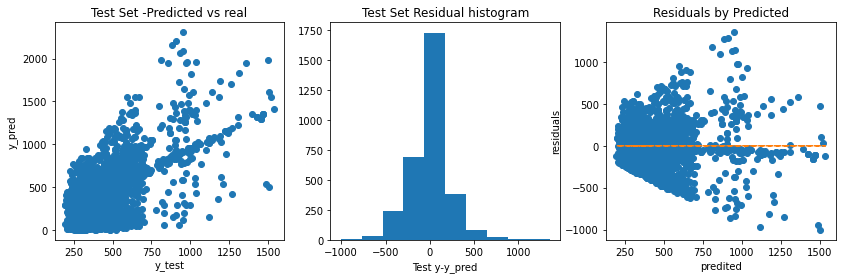

In [38]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [39]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

50743.29532989182
153.3814973382808


In [40]:
##prediction on the train set
mse(y_train,y_pred_train)

50383.637275987305

In [41]:
R2=r2_score(y_test,y_pred)
R2

0.41080159358411006

In [43]:
R2_test=model.score(x_test_scaled,y_test)
R2_train=model.score(x_train_scaled,y_train)